In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 18
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize*1.2,
          'axes.titlesize':fsize*1.5,
          'xtick.labelsize':fsize,
          'ytick.labelsize':fsize,
          'savefig.dpi': 1000}
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from analysis import analysis_funcs as af
import analysis_utils as autils
from analysis import stats
from analysis import exp_filepaths
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:,.4f}'.format

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
early_stopping_exps = {'$\delta:1e^{-4}, \\tau:2$': exp_filepaths.EARLY_STOPPING_2_1e4,
                       '$\delta:1e^{-4}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e4,
                       '$\delta:1e^{-4}, \\tau:6$': exp_filepaths.EARLY_STOPPING_6_1e4,
                       '$\delta:1e^{-3}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e3,
                       '$\delta:1e^{-5}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e5,
                       '$\delta:0, \\tau:\\infty$': exp_filepaths.ARCH_UNET_RAW}
ordered_keys = ['$\delta:1e^{-4}, \\tau:2$', '$\delta:1e^{-4}, \\tau:4$', 
                '$\delta:1e^{-4}, \\tau:6$', '$\delta:1e^{-3}, \\tau:4$', 
                '$\delta:1e^{-5}, \\tau:4$',
                '$\delta:0, \\tau:\infty$']
cpal = sns.color_palette("muted", 8)

In [3]:
def linear_smoothing(vals, weight=0.6):
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [np.nan]
    a.extend(info)
    return a

Text(0,0.5,'Validation Loss')

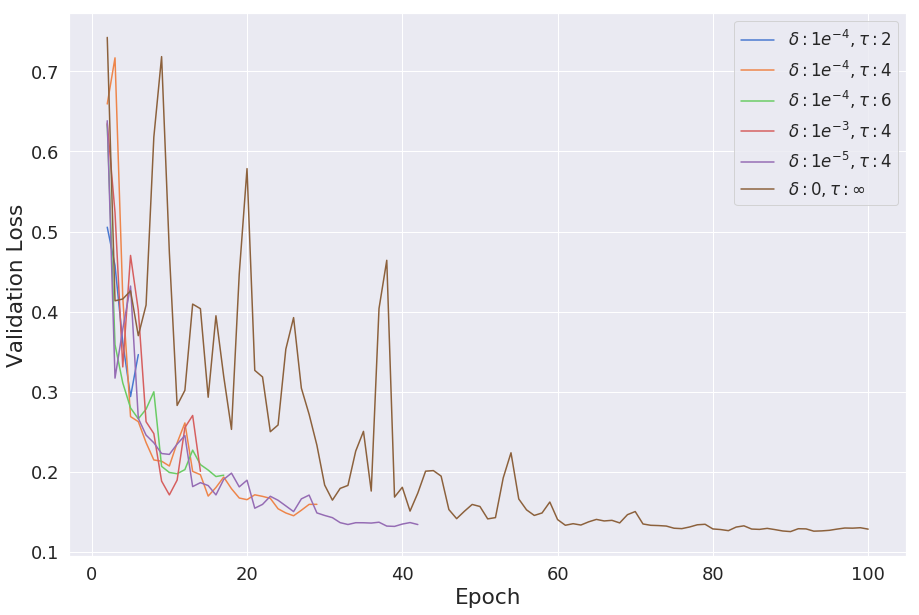

In [4]:
# plot validation losses
fig, ax = plt.subplots(1,1, figsize=(15, 10))

count = 0
for k in ordered_keys:
    exp_filepath = early_stopping_exps[k]
    # load pik file
    ind = exp_filepath.find('test_results')
    base_folder = exp_filepath[:ind]
    pik_path = os.path.join(base_folder, 'pik_data.dat')
    data = io_utils.load_pik(pik_path)
    epochs = data[0]
    val_loss = data[2]
    y = linear_smoothing(val_loss)
    ax.plot(epochs, y, color=cpal[count], linestyle='-')
    
    count += 1

ax.legend(ordered_keys)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')

In [5]:
pmats_early_stopping = stats.kruskal_dunn_analysis([early_stopping_exps[x] for x in ordered_keys], ordered_keys)

dsc:


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1.0000,0.0000,0.0015,0.0001,0.0000,0.0000
"$\delta:1e^{-4}, \tau:4$",0.0000,-1.0000,0.2156,0.8978,0.7051,0.0593
"$\delta:1e^{-4}, \tau:6$",0.0015,0.2156,-1.0000,1.0000,0.0001,0.0000
"$\delta:1e^{-3}, \tau:4$",0.0001,0.8978,1.0000,-1.0000,0.0016,0.0000
"$\delta:1e^{-5}, \tau:4$",0.0000,0.7051,0.0001,0.0016,-1.0000,1.0000
"$\delta:0, \tau:\infty$",0.0000,0.0593,0.0000,0.0000,1.0000,-1.0000



voe:


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1.0000,0.0000,0.0015,0.0001,0.0000,0.0000
"$\delta:1e^{-4}, \tau:4$",0.0000,-1.0000,0.2156,0.8978,0.7051,0.0593
"$\delta:1e^{-4}, \tau:6$",0.0015,0.2156,-1.0000,1.0000,0.0001,0.0000
"$\delta:1e^{-3}, \tau:4$",0.0001,0.8978,1.0000,-1.0000,0.0016,0.0000
"$\delta:1e^{-5}, \tau:4$",0.0000,0.7051,0.0001,0.0016,-1.0000,1.0000
"$\delta:0, \tau:\infty$",0.0000,0.0593,0.0000,0.0000,1.0000,-1.0000



cv:


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
"$\delta:1e^{-4}, \tau:4$",0.0000,-1.0000,1.0000,0.8647,1.0000,1.0000
"$\delta:1e^{-4}, \tau:6$",0.0000,1.0000,-1.0000,1.0000,1.0000,0.1951
"$\delta:1e^{-3}, \tau:4$",0.0000,0.8647,1.0000,-1.0000,0.8171,0.0204
"$\delta:1e^{-5}, \tau:4$",0.0000,1.0000,1.0000,0.8171,-1.0000,1.0000
"$\delta:0, \tau:\infty$",0.0000,1.0000,0.1951,0.0204,1.0000,-1.0000



assd:


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1.0000,0.0000,0.1543,0.0002,0.0000,0.0000
"$\delta:1e^{-4}, \tau:4$",0.0000,-1.0000,0.0011,0.4283,1.0000,0.6392
"$\delta:1e^{-4}, \tau:6$",0.1543,0.0011,-1.0000,1.0000,0.0000,0.0000
"$\delta:1e^{-3}, \tau:4$",0.0002,0.4283,1.0000,-1.0000,0.0043,0.0004
"$\delta:1e^{-5}, \tau:4$",0.0000,1.0000,0.0000,0.0043,-1.0000,1.0000
"$\delta:0, \tau:\infty$",0.0000,0.6392,0.0000,0.0004,1.0000,-1.0000


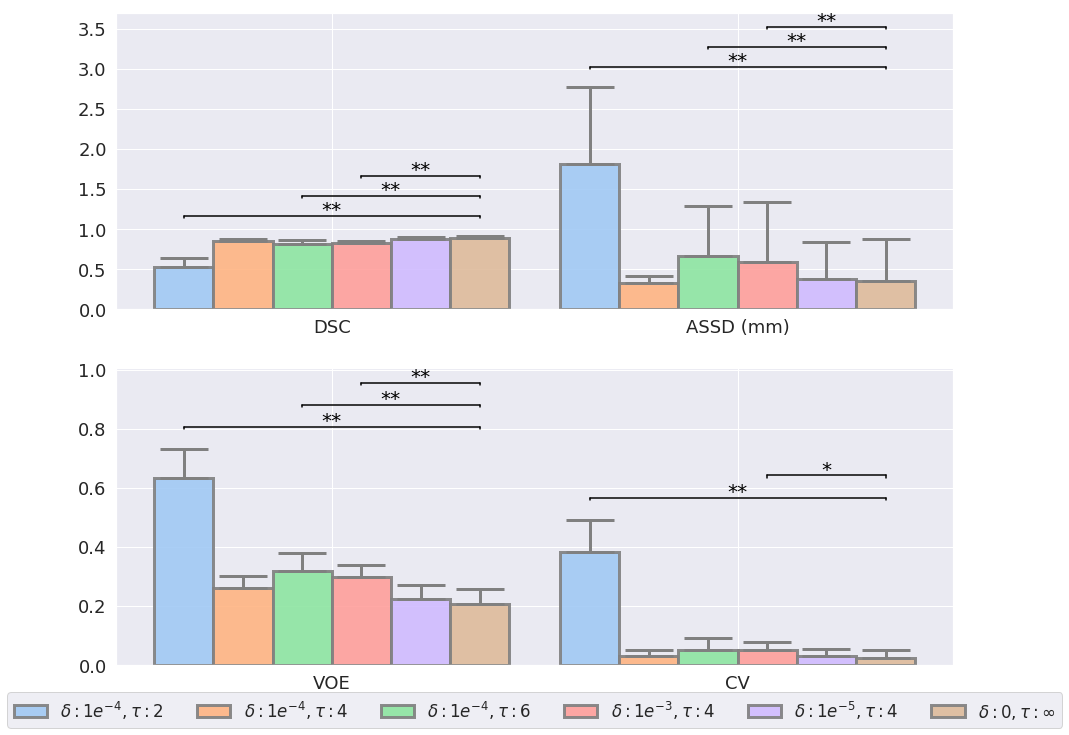

In [6]:
bar_graph_kwargs = {'spacing': 0.5, 'sig_marker_size': 20, 'line_width': 3, 'sig_thresholds': [0.05, 0.01]}
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

for pmat in pmats_early_stopping:
    pmat.iloc[:5, :5] = 1
    
autils.compare_metrics([early_stopping_exps[x] for x in ordered_keys], ordered_keys, 
                       p_sig_matrix=[pmats_early_stopping[0], pmats_early_stopping[3]], 
                       metrics=('dsc', 'assd'), **bar_graph_kwargs, ax=axs[0])
autils.compare_metrics([early_stopping_exps[x] for x in ordered_keys], ordered_keys, 
                       p_sig_matrix=[pmats_early_stopping[1], pmats_early_stopping[2]], 
                       metrics=('voe', 'cv'), **bar_graph_kwargs, ax=axs[1], sig_ax_dy= 0.15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=len(ordered_keys))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5, 0, 0))

# plt.text(-0.1, 0.5, '(A)', fontsize=30,
#             horizontalalignment='center',
#             verticalalignment='center', transform=axs[0].transAxes)
plt.savefig('/bmrNAS/people/arjun/msk_seg_networks/analysis/early_stopping/es-bar.png', bbox_inches='tight', dpi=600)